In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

from tqdm import tqdm_notebook            # pip install tqdm
from libs import stock_daum, stock_naver  # local libraries

In [3]:
import time
for i in tqdm_notebook(range(10)):
    time.sleep(0.1)

<ipython-input-3-c1690a602d1d>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

## KOSPI 200 크롤링하기

In [4]:
df_list = []
for page_df in tqdm_notebook(stock_naver.get_kospi200('KPI200', 600)):
    df_list.append(page_df)

    # 제너레이터 구현 되어있으므로 몇번의 iteration돌았다만 표현. 만약 이 바닥값이
    # 끝이 지정되어 있다면 몇 % 로 표현이 될것.
    # 총 600개의 루프  수행되었고, 총 수행시간은 1분26초. 
    # 매 루프때마다 새로운 데이터프레임 획득
    # 웹페이지 크롤링 하는 방식인데, 
    # 
    
kpi200_df = pd.concat(df_list)
print(kpi200_df.shape)
kpi200_df.head()



<ipython-input-4-8f92e190900e>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page_df in tqdm_notebook(stock_naver.get_kospi200('KPI200', 600)):


0it [00:00, ?it/s]

(3600, 5)


,체결가,전일비,등락률,거래량(천주),거래대금(백만)
날짜,,,,,
2021-10-01,394.79,6.51,-1.62%,155624.0,8429867.0
2021-09-30,401.30,1.21,+0.30%,182825.0,10477258.0
2021-09-29,400.09,6.11,-1.50%,180584.0,10878594.0
2021-09-28,406.20,4.77,-1.16%,175590.0,10219088.0
2021-09-27,410.97,1.13,+0.28%,153145.0,8269103.0


## S&P 500 크롤링하기

+ http://finance.daum.net/global/quotes/US.

In [5]:
df_list = []
for page_df in tqdm_notebook(stock_daum.get_us_sp500()):
    df_list.append(page_df)

us_sp500_df = pd.concat(df_list)
print(us_sp500_df.shape)
us_sp500_df.head()

<ipython-input-5-8d4aab6bcbb6>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page_df in tqdm_notebook(stock_daum.get_us_sp500()):


0it [00:00, ?it/s]

(4217, 16)


,symbolCode,tradePrice,tradeTime,change,changePrice,changeRate,prevClosingPrice,exchangeCountry,openingPrice,highPrice,lowPrice,accTradePrice,accTradeVolume,periodTradePrice,periodTradeVolume,listedSharesCount
date,,,,,,,,,,,,,,,,
2021-10-04,US.SP500,4348.94,09:39:19,FALL,8.10,-0.001859,4357.04,USA,4348.84,4355.51,4344.54,0,147217004,0,147217004,None
2021-10-01,US.SP500,4357.04,16:04:26,RISE,49.50,0.011491,4307.54,USA,4317.16,4375.19,4288.52,0,2174717834,0,2174717834,None
2021-09-30,US.SP500,4307.54,16:04:29,FALL,51.92,-0.011910,4359.46,USA,4370.67,4382.55,4306.24,0,2249230359,0,2249230359,None
2021-09-29,US.SP500,4359.46,16:04:13,RISE,6.83,0.001569,4352.63,USA,4362.41,4385.57,4355.08,0,1871885289,0,1871885289,None
2021-09-28,US.SP500,4352.63,16:05:24,FALL,90.48,-0.020364,4443.11,USA,4419.54,4419.54,4346.33,0,2368568193,0,2368568193,None


## 한 Axes에 그리기

<AxesSubplot:xlabel='날짜'>

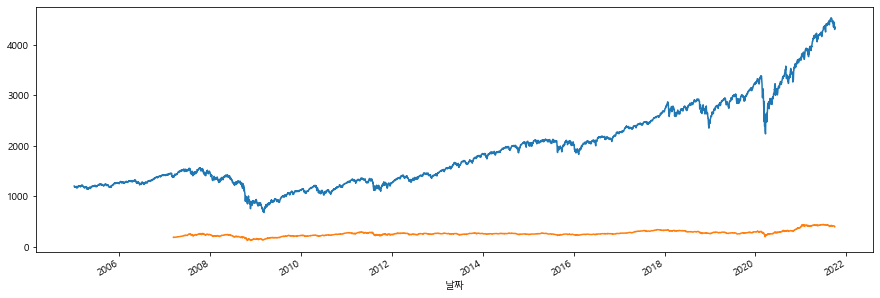

In [8]:
# 한 AX에 그리기
ax = us_sp500_df['tradePrice'].plot(figsize=(15, 5))
kpi200_df['체결가'].plot(figsize=(15, 5), ax=ax)

In [10]:
df = pd.DataFrame({
    'kpi200': kpi200_df['체결가'],
    'us_sp500': us_sp500_df['tradePrice'],
})

# 그릴 부분만 하나의 데이터 프레임으로 만들어서 
# 코스피200 체결가 데이터프레임 하나 만들고, us sp500데이터 프레임 하나 만들기

print(df.shape)
df.head()

(4325, 2)


,kpi200,us_sp500
2005-01-03,NaN,1202.08
2005-01-04,NaN,1188.05
2005-01-05,NaN,1183.74
2005-01-06,NaN,1187.89
2005-01-07,NaN,1186.19


<AxesSubplot:>

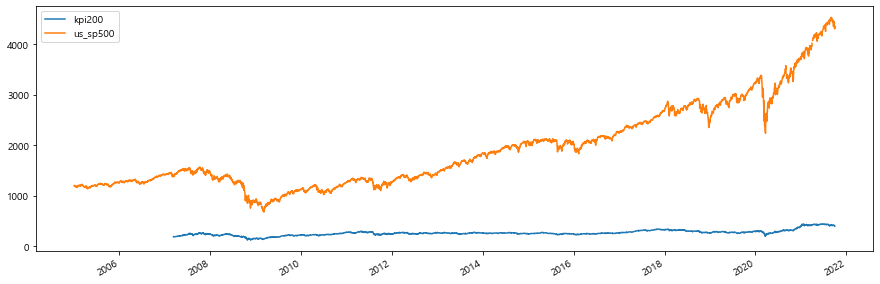

In [11]:
df.plot(figsize=(15, 5))

## 단위가 다른 2개 차트를 Ratio로 표현하여 맞추기

In [23]:
시작가 = kpi200_df['체결가'][0]
kpi200_ratio_series = 100 * kpi200_df['체결가'] / 시작가

# 0이 아닌 [-1] 로 두면 시작점이 100이 됨.

In [24]:
시작가 = us_sp500_df['tradePrice'][0]
us_sp500_ratio_series = 100 * us_sp500_df['tradePrice'] / 시작가

In [25]:
df = pd.DataFrame({
    'kpi200': kpi200_ratio_series,
    'us_sp500': us_sp500_ratio_series,
})
print(df.shape)
df.head()

(4325, 2)


,kpi200,us_sp500
2005-01-03,NaN,27.640758
2005-01-04,NaN,27.318151
2005-01-05,NaN,27.219046
2005-01-06,NaN,27.314472
2005-01-07,NaN,27.275382


<AxesSubplot:>

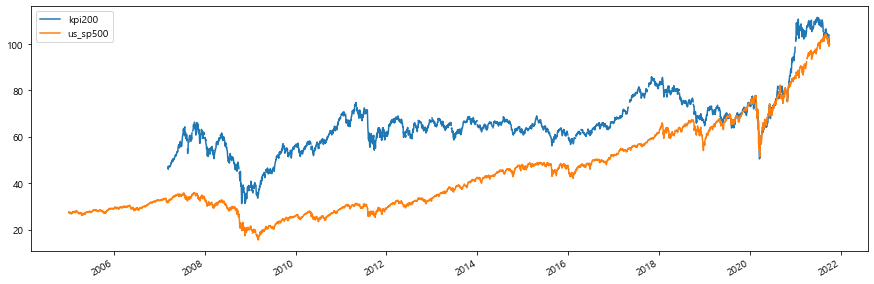

In [26]:
df.plot(figsize=(15, 5))

In [44]:
import xlwings as xw

In [50]:
from libs.utils import rgb_to_int

rgb_to_int('#FF0000')

255

In [53]:
name = 'KOSPI200 지수와 S&P500 지수'

sheet = xw.sheets.active
sheet.range('A1').value = name
sheet.range('A1').api.Font.Bold = True
sheet.range('A1').api.Font.Color = rgb_to_int('#FF0000') #RGB
sheet.range('A1:C1').api.Interior.Color = rgb_to_int('#FFFF00') #RGB
sheet.range('A2').value = df.iloc[-10:].sort_index(ascending=False)
sheet.range('A2').expand().columns.autofit()

<Picture 'KOSPI200 지수와 S&P500 지수' in <Sheet [통합 문서1]Sheet4>>

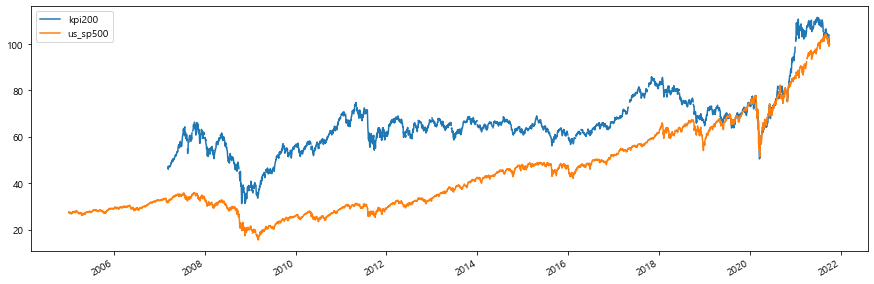

In [48]:
ax = df.plot(figsize=(15,5))

left = sheet.range('D2').left
top = sheet.range('D2').top

sheet.pictures.add(ax.figure, name=name, update=True, left=left, top=top)